# Clonamos el repositorio para obtener los dataSet

In [642]:
!git clone https://github.com/joanby/machinelearning-az.git

fatal: destination path 'machinelearning-az' already exists and is not an empty directory.


# Damos acceso a nuestro Drive

In [643]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Test it

In [644]:
!ls '/content/drive/My Drive' 

'Building AI Startups.gslides'	 'ingles exam.gdoc'
 Captura.PNG			  Ingles.gdoc
'Colab Notebooks'		 'Inglés IV  38448-104 ma y ju 11.00- 1:00'
 cosineSimilarity.gsheet	 'Jam sin título.gjam'
'Cuadro comparativo.gdoc'	  Multimedia
'Documento sin título (1).gdoc'  'Practica7 crawler.gdoc'
'Documento sin título.gdoc'	 'Proyecto Final Sharck Dj en mp3.gdoc'
 Estudio			 'Temas Html a explicar.gdoc'
'examen de ingles.gdoc'		  Untitled0.ipynb
'frases que no se.gdoc'		 'zjh-tzyc-atv - 29 abr 2021.gjam'


#Google colab tools

In [645]:
from google.colab import files # Para manejar los archivos y, por ejemplo, exportar a su navegador
import glob # Para manejar los archivos y, por ejemplo, exportar a su navegador
from google.colab import drive # Montar tu Google drive

#Instalar dependendias

In [646]:
!pip install sklearn

# SVR

# Cómo importar las librerías


importar librerias

In [647]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importar el data set


importamos dataset y separamos

In [648]:
dataset = pd.read_csv('/content/machinelearning-az/datasets/Part 2 - Regression/Section 7 - Support Vector Regression (SVR)/Position_Salaries.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values
display(dataset)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [649]:
display(pd.DataFrame(X))

,0
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [650]:
display(pd.DataFrame(y))

,0
0,45000
1,50000
2,60000
3,80000
4,110000
5,150000
6,200000
7,300000
8,500000
9,1000000


# Dividir el data set en conjunto de entrenamiento y conjunto de testing


no separamos el dataset pues es muy pequeño

In [651]:
"""
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
"""

'\nfrom sklearn.model_selection import train_test_split\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)\n'

# Escalado de variables

normalizamos las variables para el buen funcionamiento del algoritmo

In [652]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y.reshape(-1,1))
display(pd.DataFrame(y))

,0
0,-0.720043
1,-0.702438
2,-0.667228
3,-0.596808
4,-0.491178
5,-0.350339
6,-0.174289
7,0.177810
8,0.882008
9,2.642503


# Ajustar la regresión con el dataset

In [653]:
from sklearn.svm import SVR

indicamos kernel de la maquina de soporte vectorial y ajustamos el modelo

parametros->https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html



In [654]:
regression = SVR(kernel = "rbf")
regression.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

# Predicción de nuestros modelos con SVR


predecimos un dato , aplicando primero la estandarizacion al dato, despues lo predecimos e invertimos la transformacion

In [655]:
y_pred = sc_y.inverse_transform(regression.predict(sc_X.transform(np.array([[6.5]]))))
print(y_pred)

[170370.0204065]


# Visualización de los resultados del SVR

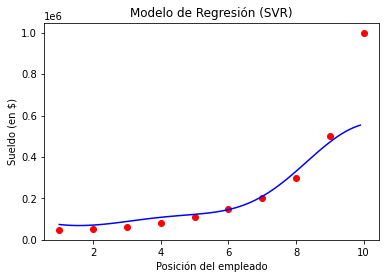

In [656]:
X=sc_X.inverse_transform(X)
y=sc_y.inverse_transform(y)
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape(len(X_grid), 1)
plt.scatter(X, y, color = "red")
plt.plot(X_grid,sc_y.inverse_transform(regression.predict(sc_X.transform(X_grid))), color = "blue")
plt.title("Modelo de Regresión (SVR)")
plt.xlabel("Posición del empleado")
plt.ylabel("Sueldo (en $)")
plt.show()

In [658]:
display(y)

array([[  45000.],
       [  50000.],
       [  60000.],
       [  80000.],
       [ 110000.],
       [ 150000.],
       [ 200000.],
       [ 300000.],
       [ 500000.],
       [1000000.]])